# Spaceship Titanic Project
Nombre: Valentina Vergara
Rol: 202010523-5
Rut: 20808264-7


## 1. Definición del problema
### Contexto del problema:
Bienvenido al año 2912, donde se necesitan tus habilidades de ciencia de datos para resolver un misterio cósmico. Hemos recibido una transmisión desde cuatro años luz de distancia y las cosas no pintan bien.

La nave espacial Titanic fue un transatlántico de pasajeros interestelar lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Titanic chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

### Data disponible y objetivo:
Se cuenta con un archivo cvs que contiene el estado de cada pasajero.
Luego, se cuenta con un archivo cvs de testeo y de prueba, con la información de cada pasajero. La idea del programa es utilizar análisis de datos para predecir si un pasajero fue transportado o no.
En las siguientes líneas de código, se importan las librerías necesarias para hacer este análisis, además de leer los archivos disponibles para trabajar.

In [1]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time


In [2]:
# Leyendo los archivos
train = pd.read_csv('/content/drive/MyDrive/spaceship-titanic.zip (Unzipped Files)/train.csv')
test  = pd.read_csv('/content/drive/MyDrive/spaceship-titanic.zip (Unzipped Files)/test.csv')
transport = pd.read_csv('/content/drive/MyDrive/spaceship-titanic.zip (Unzipped Files)/sample_submission.csv')

In [3]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              BaggingClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier
                             )
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import (BernoulliNB,
                                 GaussianNB,
                                 MultinomialNB
                                )


In [6]:
# Modelos
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## 2. Estadística descriptiva
Se obtienen datos estadísticos a partir del set de data de entrenamiento.

In [7]:
# Shape and preview
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
train.head()

Train set shape: (8693, 14)
Test set shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Se puede apreciar que el set contiene el id de cada pasajero, junto con su continente de orígen, si escogieron sueño criogénico, la cabina en la que se quedan, el destino de su viaje, su edad, si escogieron el plan vip, sus gastos en servicio a la habitación, patio de comida, centro comercial, spa, y la cubierta de realidad virtual. Finalmente, también está disponible el nombre de cada pasagero, y la columna 'target', que es si fue transportado o no. Notamos que hay 8693 datos de entrenamiento.

In [8]:
# tipos de datos
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [9]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [10]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
train.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## 3. Visualización descriptiva
Veamos que aproximadamente la mitad de la tripulación fue abducida

Text(0.5, 1.0, 'Target distribution')

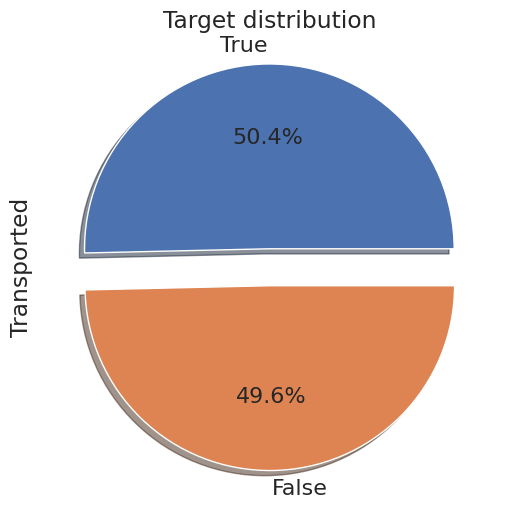

In [12]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
train['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

### Variables cuantitativas
Visualmente, se explora la distribución de edades en la nave, y los gastos de los pasajeros.

Text(0.5, 0, 'Edad')

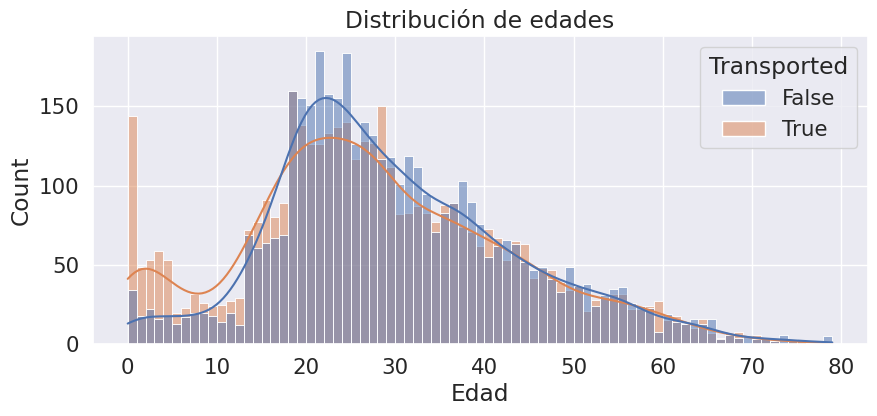

In [13]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Distribución de edades')
plt.xlabel('Edad')

Notemos que desde los 0 a los 18 años, había una mayor probabilidad de ser transportado, mientras que los de 25 a 40 años era menos probable que sean transportados. Luego, desde los 40 años, la probabilidad de ser o no transportado es la misma.

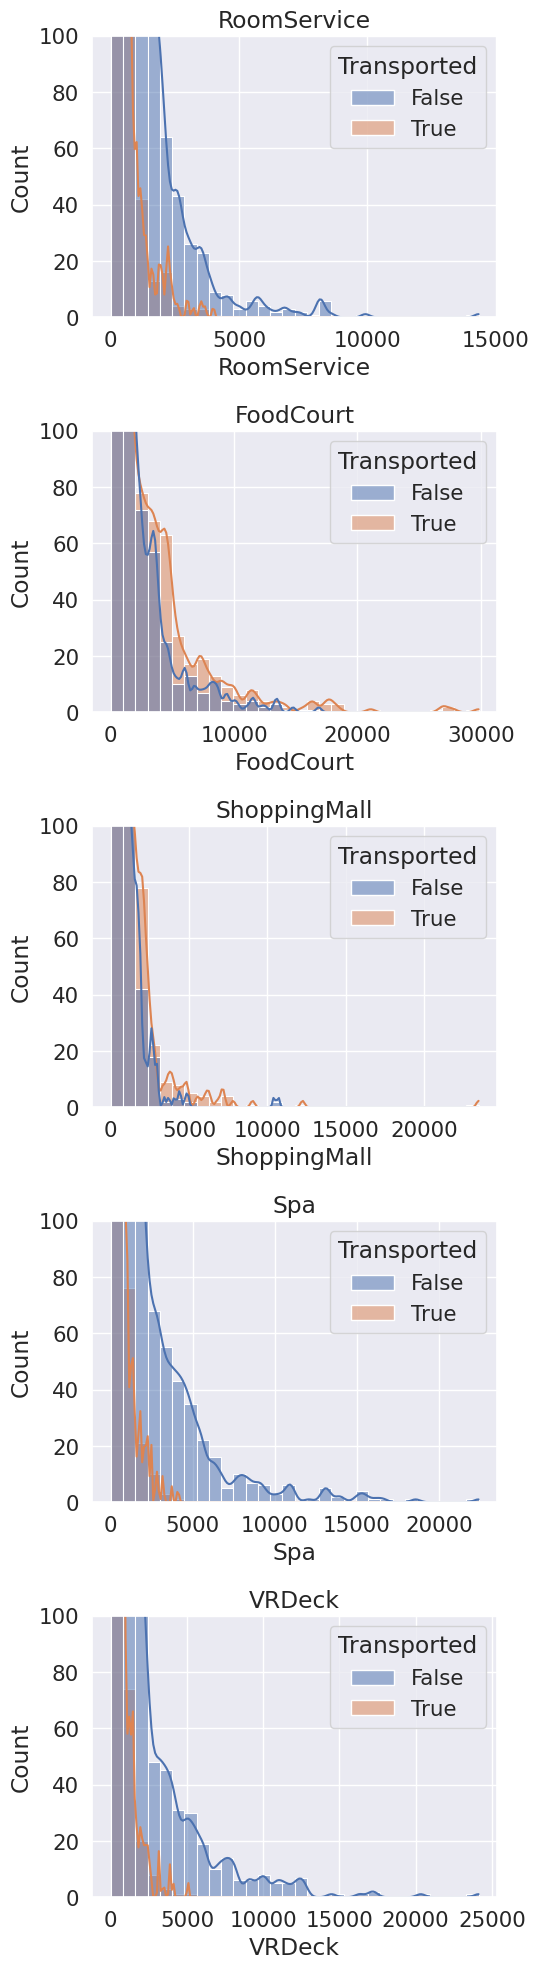

In [14]:
# Gastos
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

Visualmente, podemos hacer las siguientes hipótesis:
- La mayoría de los transportados gastaron poco en general.
- Casi todos los que gastaron mucho en el patio de comida, fueron abducidos.
- Los que gastaron en servicio a la habitación, tienen menos probabilidades de transporte.
- Los que gastaron en el patio de comidas, tienen más probabilidad de transporte, sobre todo si gastaron más de \$300.
- Los que gastaron en el centro comercial, tienen más probabilidad de transporte, sobre todo si gastaron más de \$2000.
- Los que gastaron en el spa, tienen menos probabilidades de transporte.
- Los que gastaron en la cubierta de realidad virtual, tienen menos probabilidades de transporte.

### Variables cualitativas
Se analiza el lugar de orígen, el sueño criogénico, el lugar de destino, y el pase vip de los pasajeros abducidos.

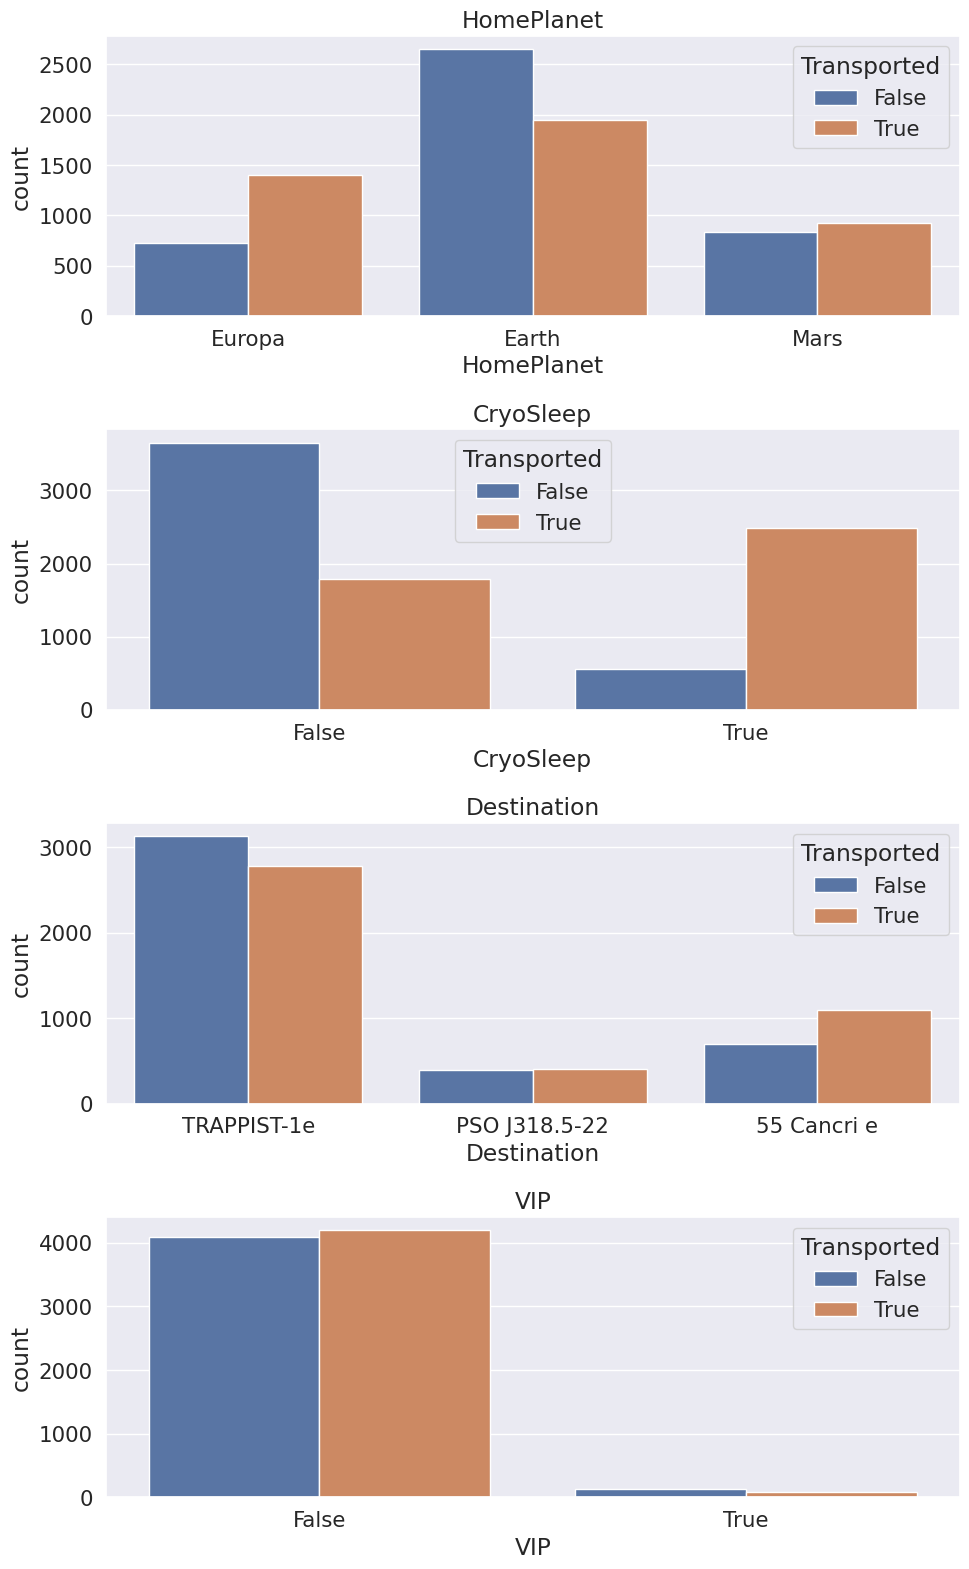

In [15]:
# columnas
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

Text(0.5, 1.0, 'Heatmap of missing values')

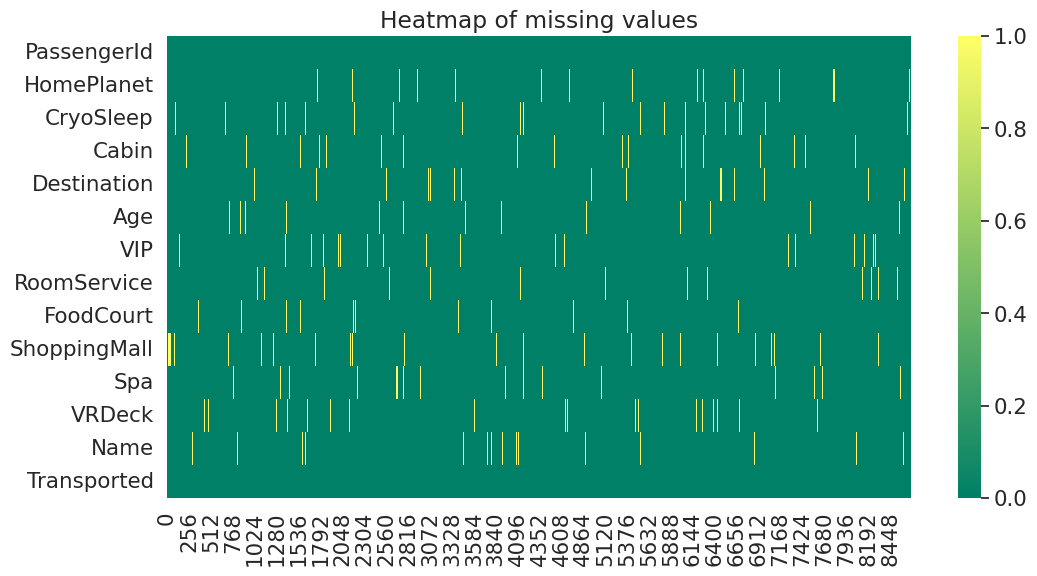

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isna().T, cmap='summer')
plt.title('Heatmap of missing values')

Podemos hacer las siguientes hipótesis a partir de las visualizaciones:
- PassengerId tiene la forma gggg_pp, donde gggg indica el grupo con el que viaja el pasajero y pp es su número dentro del grupo.
- Cabin tiene la forma deck/num/side, donde side puede ser P para babor (Port) o S para estribor (Starboard).
- La mayoría de la gente de Europa fue abducida.
- Hubo más gente de la tierra no abducida que abducida.
- La gente de Marte tuvo igual cantidad de gente abducida y no abducida.
- El factor del sueño criogénico es uno de los más relevantes, o al menos, tiene la mayor correlación con las abducciones.
- El destino no influyó de manera significante, aunque para la gente que iba a 55-Cancrie, la probabilidad de ser abducido era mayor.
- El factor VIP no influyó en las abducciones, ya que para ambos planes, las cantidad de personas abducidas y no abducidas era igual.
- Hay pocos datos vacíos y estan repartidos equitativamente por los pasajeros, por lo que no influirá mucho rellenar estos valores .



Ideas:

 Podemos extraer el grupo y el tamaño del grupo a partir de la característica PassengerId.
- Podemos extraer la cubierta (deck), el número y el lado (side) de la característica Cabin.
- Podríamos extraer el apellido de la característica Name para identificar a las familias.



## 4. Preprocesamiento

### Data de entrenamiento
Adaptamos el set de datos para la comodidad al aplicar los modelos deseados.

In [17]:
#Rellenando valores vacíos
train['RoomService'] = train['RoomService'].fillna(train['RoomService'].median())
train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].median())
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].median())
train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].median())
train['Spa'] = train['Spa'].fillna(train['Spa'].median())
train['CryoSleep'] = train['CryoSleep'].astype(bool)
train['VIP'] = train['VIP'].astype(bool)
train['HomePlanet'] = train['HomePlanet'].fillna('Earth')
train['Destination'] = train['Destination'].fillna('TRAPPIST-1e')
train['CryoSleep'] = train['CryoSleep'].fillna(False)
train['VIP'] = train['VIP'].fillna(False)
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Cabin'] = train['Cabin'].fillna('B/0/S')

In [18]:
# Columna de gastos totales
train['Total_spending'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['VRDeck'] + train['Spa']

In [19]:
# Separando la columnas Cabin
train['Cabin_Side'] = train['Cabin'].str.split("/").str[2]
train['Cabin_Deck'] = train['Cabin'].str.split("/").str[0]
train = train.drop('Cabin',axis=1)

In [20]:
print('TRAIN SET MISSING VALUES:')
print(train.isna().sum())

TRAIN SET MISSING VALUES:
PassengerId         0
HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              200
Transported         0
Total_spending      0
Cabin_Side          0
Cabin_Deck          0
dtype: int64


In [21]:
#Nos deshacemos de os valores vacíos
train = train.dropna()
train.drop("Name",axis="columns",inplace=True)

In [22]:
train['CryoSleep'].replace({False:0,True:1},inplace=True)
train['Transported'].replace({False:0,True:1},inplace=True)
train['VIP'].replace({False:0,True:1},inplace=True)

In [23]:
train['HomePlanet'] = train['HomePlanet'].astype('category')
train['Destination'] = train['Destination'].astype('category')
train['Cabin_Deck'] = train['Cabin_Deck'].astype('category')
train['Cabin_Side'] = train['Cabin_Side'].astype('category')

In [24]:
train = pd.get_dummies(train,columns=['HomePlanet','Destination','Cabin_Deck','Cabin_Side'])

### Data de testeo
Modificamos y escalamos el data de testeo

In [25]:
test['RoomService'] = test['RoomService'].fillna(test['RoomService'].median())
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].median())
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].median())
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].median())
test['Spa'] = test['Spa'].fillna(test['Spa'].median())
test['CryoSleep'] = test['CryoSleep'].astype(bool)
test['VIP'] = test['VIP'].astype(bool)
test['HomePlanet'] = test['HomePlanet'].fillna('Earth')
test['Destination'] = test['Destination'].fillna('TRAPPIST-1e')
test['CryoSleep'] = test['CryoSleep'].fillna(False)
test['VIP'] = test['VIP'].fillna(False)
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Cabin'] = test['Cabin'].fillna('B/0/S')

In [26]:
test['Total_spending'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['VRDeck'] + test['Spa']


In [27]:
print('TEST SET MISSING VALUES:')
print(test.isna().sum())

TEST SET MISSING VALUES:
PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name              94
Total_spending     0
dtype: int64


In [28]:
# Separando la columna cabin
test['Cabin_Side'] = test['Cabin'].str.split("/").str[2]
test['Cabin_Deck'] = test['Cabin'].str.split("/").str[0]
test = test.drop('Cabin', axis=1)


In [29]:
# Nos deshacemos de los valores vacios
test = test.dropna()
test.drop("Name", axis="columns", inplace=True)


In [30]:
test['CryoSleep'].replace({False: 0, True: 1}, inplace=True)

test['VIP'].replace({False: 0, True: 1}, inplace=True)


In [31]:
test['HomePlanet'] = test['HomePlanet'].astype('category')
test['Destination'] = test['Destination'].astype('category')
test['Cabin_Deck'] = test['Cabin_Deck'].astype('category')
test['Cabin_Side'] = test['Cabin_Side'].astype('category')


In [32]:
test = pd.get_dummies(test,columns=['HomePlanet','Destination','Cabin_Deck','Cabin_Side'])

In [33]:
test

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spending,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,0013_01,1,27.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
1,0018_01,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0,2832.0,...,0,0,0,0,0,1,0,0,0,1
2,0019_01,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3,0021_01,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0,7418.0,...,0,0,1,0,0,0,0,0,0,1
4,0023_01,0,20.000000,0,10.0,0.0,635.0,0.0,0.0,645.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4273,9269_01,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,1018.0,...,0,1,0,0,0,0,0,0,0,1
4274,9271_01,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4275,9273_01,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,3203.0,...,0,0,0,1,0,0,0,0,1,0


## 5. Selección de modelo

In [34]:
Y = train['Transported']
X = train.drop('Transported',axis='columns')

In [35]:
X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=41)


In [36]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Random forest accuracy: {}".format(metrics.accuracy_score(y_test,rfc_pred)))
print()
print()


abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
abc_pred = abc.predict(X_test)
print("Adaboost accuracy: {}".format(metrics.accuracy_score(y_test,abc_pred)))
print()
print()


gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print("Gaussian NB accuracy: {}".format(metrics.accuracy_score(y_test,gnb_pred)))
print()
print()


mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb_pred = mnb.predict(X_test)
print("Multinomial NB accuracy: {}".format(metrics.accuracy_score(y_test,mnb_pred)))
print()
print()




Random forest accuracy: 0.8065149136577708


Adaboost accuracy: 0.793171114599686


Gaussian NB accuracy: 0.6620879120879121


Multinomial NB accuracy: 0.6840659340659341




Vemos que el modelo de Random Forest es el que mejor representa la muestra.

## 6. Métricas y análisis de resultados



In [37]:

x_test = test
y_test = transport[transport['PassengerId'].isin(test['PassengerId'])]

In [38]:
y_pred = rfc.predict(test)

In [47]:
y_true = transport[transport['PassengerId'].isin(test['PassengerId'])]

In [57]:
y_true['Transported'] = y_true['Transported'].astype(bool)

In [59]:
y_true['Transported'] = y_true['Transported'].astype(int)

In [63]:
accuracy = accuracy_score(y_true['Transported'], y_pred)
print(accuracy)

0.5304805163758068


In [67]:
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [68]:

# Now calculate the confusion matrix
cm = confusion_matrix(y_true['Transported'], y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[2219 1964]
 [   0    0]]


Verdaderos Positivos (VP): 2219 \\
Falsos Positivos (FP): 1964 \\
Verdaderos Negativos (VN): 0 \\
Falsos Negativos (FN): 0 \\

Esta matriz de confusión sugiere que nuestro modelo hizo predicciones positivas correctas (2219) pero realizó un gran número de predicciones falsas positivas (1964). El modelo no hizo ninguna predicción negativa correcta, y no hubo instancias en las que predijo correctamente la clase negativa.







## 7. Visualizaciones del modelo


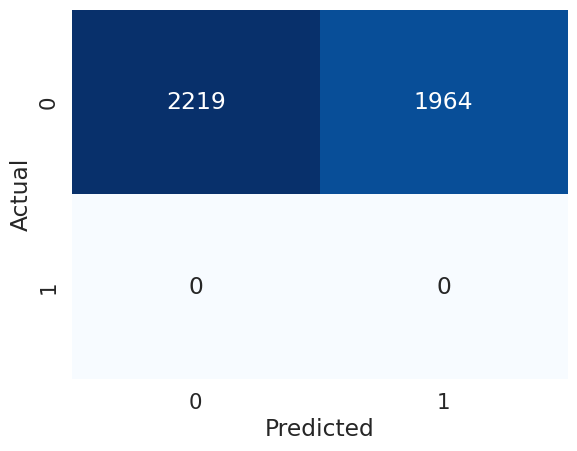

In [69]:

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

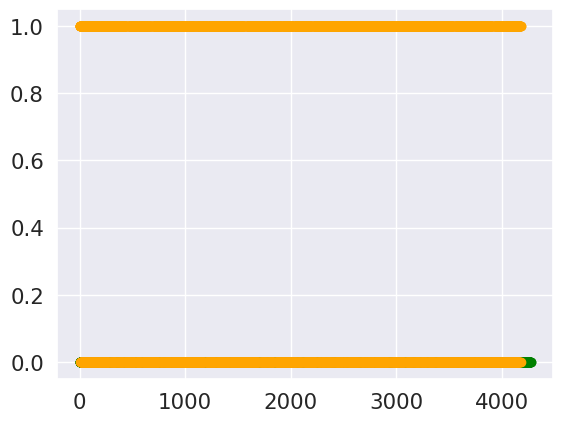

In [72]:
plt.plot(y_true['Transported'], marker='o', linestyle='',color='green')
plt.plot(y_pred, marker='o', linestyle='',color='orange')
plt.show()